In [ ]:
!pip install qiskit
!pip install qiskit_aer                   #simulacion de alto desempeño
!pip install "qiskit[visualization]"      #visualizacion de los circitos cuanticos
!pip install qiskit_machine_learning
!pip install qiskit_algorithms
!pip install -U qiskit qiskit-machine-learning qiskit-aer qiskit-algorithms



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=cebaa4c72b7f7e7508a2824f23d6048b7a8dbf5c5354fbfd47a24869aba2dfbd
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📥 Cargando dataset...
🔍 Detectando outliers...
✅ Dataset preparado: Train=240, Test=60, Qubits=8

🔬 INICIANDO EXPERIMENTO DE ENTANGLEMENT

🧪 Probando entanglement: LINEAR
   Descripción: Lineal (Q0-Q1-Q2-...)
   ⏳ Entrenando... ✓ (286.5s)
   📊 R² Test: -2.5900 | MAE: 0.0144

🧪 Probando entanglement: CIRCULAR
   Descripción: Circular (Q0-Q1-...-Q7-Q0)
   ⏳ Entrenando... ✓ (331.9s)
   📊 R² Test: -2.5900 | MAE: 0.0144

🧪 Probando entanglement: FULL
   Descripción: Full (todos con todos)
   ⏳ Entrenando... ✓ (725.7s)
   📊 R² Test: -2.5900 | MAE: 0.0144

🧪 Probando entanglement: SCA
   Descripción: SCA (Strongly Connected)
   ⏳ Entrenando... ✓ (347.6s)
   📊 R² Test: -2.5900 | MAE: 0.0144

📊 RESULTADOS COMPARATIVOS
Entanglement  R² Train  R² Test  MSE Test  RMSE Test  MAE Test  Overfitting  Tiempo (s)
      linear   -3.9750  -2.5900    0.0002     0.0153    0.0144      -1.3849    286.4606
    circular   -3.9750  -2.5900    0.0002     0.0153    0.0144      -1.3849    331.8919
        full   -3

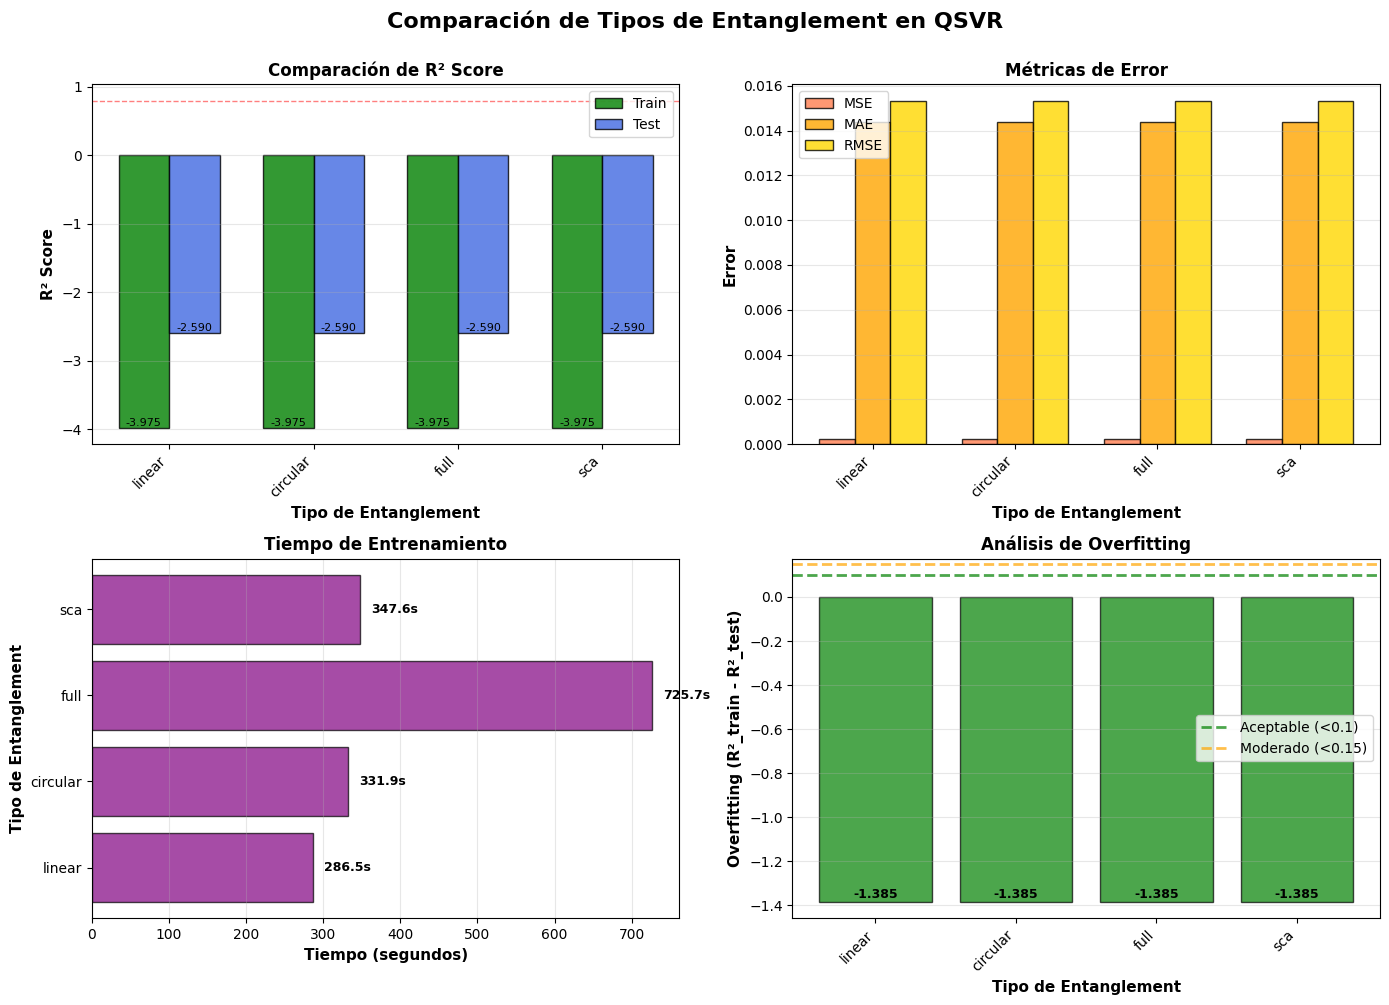


🎯 RECOMENDACIONES FINALES

1️⃣  MÁXIMA PRECISIÓN:
   → LINEAR
   R² Test: -2.5900
   MAE: 0.0144

2️⃣  MEJOR BALANCE (Precisión/Tiempo):
   → FULL
   R² Test: -2.5900
   Tiempo: 725.7s

3️⃣  MEJORA vs LINEAR:
   → Mejora de -0.0% en R² usando LINEAR

4️⃣  RECOMENDACIÓN DE USO:
   ⚠️  Precisión moderada. Sugerencias:
      - Aumentar 'reps' en feature map (2 → 3)
      - Ajustar C y epsilon en QSVR
      - Usar más datos de entrenamiento

✅ Experimento completado. Gráficos guardados en 'entanglement_comparison.png'


In [ ]:
# =============================================
# Experimento Completo: Comparación de Entanglement
# =============================================

import warnings
warnings.filterwarnings("ignore")

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVR
from qiskit_machine_learning.kernels import FidelityQuantumKernel

# =============================================
# 📥 PASO 1: Cargar y preparar datos
# =============================================
print("📥 Cargando dataset...")
url = "https://raw.githubusercontent.com/Alisser2001/QuantumMachineLearning/emmadev/elevators.dat"

try:
    resp = requests.get(url, timeout=10)
    resp.raise_for_status()
    lines = [l.strip() for l in resp.text.splitlines()]
except Exception as e:
    print(f"❌ Error descargando datos: {e}")
    exit(1)

# Parsear archivo
attributes = [line.split()[1] for line in lines if line.lower().startswith("@attribute")]
data_start = next(i for i, l in enumerate(lines) if l.lower() == "@data") + 1
rows = [ln for ln in lines[data_start:] if ln and not ln.startswith('%')]
data = [r.split(',') for r in rows]

df = pd.DataFrame(data, columns=attributes).apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Selección de features
features = ['SaTime1', 'SaTime2', 'SaTime3', 'SaTime4', 'Sa', 'AbsRoll', 'Q', 'ClimbRate']
target = 'Goal'
X, y = df[features].copy(), df[target].copy()

# Detección de outliers
print("🔍 Detectando outliers...")
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_mask = lof.fit_predict(X) == 1
X, y = X[outlier_mask].reset_index(drop=True), y[outlier_mask].reset_index(drop=True)

# Muestreo (reducido para velocidad del experimento)
SAMPLE_SIZE = min(300, len(X))  # 3000 muestras para experimento rápido
idx = np.random.choice(len(X), SAMPLE_SIZE, replace=False)
X, y = X.iloc[idx].reset_index(drop=True), y.iloc[idx].reset_index(drop=True)

# Transformaciones
for c in ['SaTime1', 'SaTime2', 'SaTime3', 'SaTime4']:
    X[c] = np.log1p(np.clip(X[c].values, a_min=1e-6, a_max=None))

# Escalado
scaler = MinMaxScaler(feature_range=(0, 2 * np.pi))
X_scaled = scaler.fit_transform(X)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

num_qubits = X_train.shape[1]
print(f"✅ Dataset preparado: Train={X_train.shape[0]}, Test={X_test.shape[0]}, Qubits={num_qubits}\n")

# =============================================
# 🔬 PASO 2: Experimento de Entanglement
# =============================================

entanglement_types = {
    'linear': 'Lineal (Q0-Q1-Q2-...)',
    'circular': 'Circular (Q0-Q1-...-Q7-Q0)',
    'full': 'Full (todos con todos)',
    'sca': 'SCA (Strongly Connected)'
}

results = []
models = {}

print("🔬 INICIANDO EXPERIMENTO DE ENTANGLEMENT")
print("="*60)

for ent_type, description in entanglement_types.items():
    print(f"\n🧪 Probando entanglement: {ent_type.upper()}")
    print(f"   Descripción: {description}")

    try:
        # Crear feature map
        feature_map = ZZFeatureMap(
            feature_dimension=num_qubits,
            reps=2,
            entanglement=ent_type,
            insert_barriers=False
        )

        # Crear kernel
        qkernel = FidelityQuantumKernel(
            feature_map=feature_map,
            enforce_psd=True
        )

        # Crear QSVR
        qsvr = QSVR(
            quantum_kernel=qkernel,
            C=1.0,
            epsilon=0.1,
            tol=1e-3,
            cache_size=500
        )

        # Entrenar
        print("   ⏳ Entrenando...", end=" ", flush=True)
        t0 = time.perf_counter()
        qsvr.fit(X_train, y_train.values)
        training_time = time.perf_counter() - t0
        print(f"✓ ({training_time:.1f}s)")

        # Predecir
        y_pred_train = qsvr.predict(X_train)
        y_pred_test = qsvr.predict(X_test)

        # Calcular métricas
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        rmse_test = np.sqrt(mse_test)
        overfitting = r2_train - r2_test

        # Guardar resultados
        results.append({
            'Entanglement': ent_type,
            'R² Train': r2_train,
            'R² Test': r2_test,
            'MSE Test': mse_test,
            'RMSE Test': rmse_test,
            'MAE Test': mae_test,
            'Overfitting': overfitting,
            'Tiempo (s)': training_time
        })

        models[ent_type] = qsvr

        print(f"   📊 R² Test: {r2_test:.4f} | MAE: {mae_test:.4f}")

        if overfitting > 0.15:
            print(f"   ⚠️  Overfitting: {overfitting:.3f}")

    except Exception as e:
        print(f"   ❌ Error: {str(e)}")
        continue

# =============================================
# 📊 PASO 3: Análisis de Resultados
# =============================================

if not results:
    print("\n❌ No se obtuvieron resultados. Verifica los errores anteriores.")
    exit(1)

results_df = pd.DataFrame(results)

print("\n" + "="*80)
print("📊 RESULTADOS COMPARATIVOS")
print("="*80)
print(results_df.to_string(index=False, float_format=lambda x: f'{x:.4f}'))
print("="*80)

# Identificar el mejor modelo
best_idx = results_df['R² Test'].idxmax()
best_model = results_df.loc[best_idx]

print(f"\n🏆 GANADOR: {best_model['Entanglement'].upper()}")
print(f"   R² Test: {best_model['R² Test']:.4f}")
print(f"   MAE Test: {best_model['MAE Test']:.4f}")
print(f"   Tiempo: {best_model['Tiempo (s)']:.1f}s")

# =============================================
# 📈 PASO 4: Visualización
# =============================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparación de Tipos de Entanglement en QSVR',
             fontsize=16, fontweight='bold', y=1.00)

# 1. R² Score Comparison
ax = axes[0, 0]
x_pos = np.arange(len(results_df))
width = 0.35

bars1 = ax.bar(x_pos - width/2, results_df['R² Train'], width,
               label='Train', alpha=0.8, color='green', edgecolor='black')
bars2 = ax.bar(x_pos + width/2, results_df['R² Test'], width,
               label='Test', alpha=0.8, color='royalblue', edgecolor='black')

ax.set_xlabel('Tipo de Entanglement', fontweight='bold', fontsize=11)
ax.set_ylabel('R² Score', fontweight='bold', fontsize=11)
ax.set_title('Comparación de R² Score', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(results_df['Entanglement'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(0.8, color='red', linestyle='--', linewidth=1, alpha=0.5)

# Añadir valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 2. Error Metrics
ax = axes[0, 1]
x_pos = np.arange(len(results_df))
width = 0.25

ax.bar(x_pos - width, results_df['MSE Test'], width,
       label='MSE', alpha=0.8, color='coral', edgecolor='black')
ax.bar(x_pos, results_df['MAE Test'], width,
       label='MAE', alpha=0.8, color='orange', edgecolor='black')
ax.bar(x_pos + width, results_df['RMSE Test'], width,
       label='RMSE', alpha=0.8, color='gold', edgecolor='black')

ax.set_xlabel('Tipo de Entanglement', fontweight='bold', fontsize=11)
ax.set_ylabel('Error', fontweight='bold', fontsize=11)
ax.set_title('Métricas de Error', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(results_df['Entanglement'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 3. Tiempo de Entrenamiento
ax = axes[1, 0]
bars = ax.barh(results_df['Entanglement'], results_df['Tiempo (s)'],
               color='purple', alpha=0.7, edgecolor='black')
ax.set_xlabel('Tiempo (segundos)', fontweight='bold', fontsize=11)
ax.set_ylabel('Tipo de Entanglement', fontweight='bold', fontsize=11)
ax.set_title('Tiempo de Entrenamiento', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

for i, (bar, val) in enumerate(zip(bars, results_df['Tiempo (s)'])):
    ax.text(val + max(results_df['Tiempo (s)'])*0.02, i,
            f'{val:.1f}s', va='center', fontweight='bold', fontsize=9)

# 4. Overfitting Analysis
ax = axes[1, 1]
colors = ['green' if x < 0.1 else 'orange' if x < 0.15 else 'red'
          for x in results_df['Overfitting']]
bars = ax.bar(results_df['Entanglement'], results_df['Overfitting'],
              color=colors, alpha=0.7, edgecolor='black')

ax.axhline(0.1, color='green', linestyle='--', linewidth=2,
           alpha=0.7, label='Aceptable (<0.1)')
ax.axhline(0.15, color='orange', linestyle='--', linewidth=2,
           alpha=0.7, label='Moderado (<0.15)')
ax.set_xlabel('Tipo de Entanglement', fontweight='bold', fontsize=11)
ax.set_ylabel('Overfitting (R²_train - R²_test)', fontweight='bold', fontsize=11)
ax.set_title('Análisis de Overfitting', fontsize=12, fontweight='bold')
ax.set_xticklabels(results_df['Entanglement'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Añadir valores
for bar, val in zip(bars, results_df['Overfitting']):
    ax.text(bar.get_x() + bar.get_width()/2., val + 0.005,
            f'{val:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('entanglement_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================
# 🎯 PASO 5: Recomendaciones
# =============================================

print("\n" + "="*80)
print("🎯 RECOMENDACIONES FINALES")
print("="*80)

# Balance óptimo
results_df['Eficiencia'] = results_df['R² Test'] / (results_df['Tiempo (s)'] / 60 + 0.1)
best_eff_idx = results_df['Eficiencia'].idxmax()
best_efficiency = results_df.loc[best_eff_idx]

print(f"\n1️⃣  MÁXIMA PRECISIÓN:")
print(f"   → {best_model['Entanglement'].upper()}")
print(f"   R² Test: {best_model['R² Test']:.4f}")
print(f"   MAE: {best_model['MAE Test']:.4f}")

print(f"\n2️⃣  MEJOR BALANCE (Precisión/Tiempo):")
print(f"   → {best_efficiency['Entanglement'].upper()}")
print(f"   R² Test: {best_efficiency['R² Test']:.4f}")
print(f"   Tiempo: {best_efficiency['Tiempo (s)']:.1f}s")

print(f"\n3️⃣  MEJORA vs LINEAR:")
if 'linear' in results_df['Entanglement'].values:
    linear_r2 = results_df[results_df['Entanglement']=='linear']['R² Test'].values[0]
    improvement = ((best_model['R² Test'] - linear_r2) / linear_r2) * 100
    print(f"   → Mejora de {improvement:.1f}% en R² usando {best_model['Entanglement'].upper()}")
else:
    print("   → Linear no disponible para comparación")

print(f"\n4️⃣  RECOMENDACIÓN DE USO:")
if best_model['R² Test'] >= 0.80:
    print(f"   ✅ Usar '{best_model['Entanglement']}' para producción (excelente precisión)")
elif best_model['R² Test'] >= 0.75:
    print(f"   ⚠️  Usar '{best_model['Entanglement']}' pero considerar ajuste de hiperparámetros")
else:
    print(f"   ⚠️  Precisión moderada. Sugerencias:")
    print(f"      - Aumentar 'reps' en feature map (2 → 3)")
    print(f"      - Ajustar C y epsilon en QSVR")
    print(f"      - Usar más datos de entrenamiento")

print("\n" + "="*80)
print("✅ Experimento completado. Gráficos guardados en 'entanglement_comparison.png'")

In [ ]:
# =============================================
# Comparación Rápida: Linear vs Full Entanglement
# =============================================

import warnings
warnings.filterwarnings("ignore")

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVR
from qiskit_machine_learning.kernels import FidelityQuantumKernel

np.random.seed(42)

# =============================================
# 📥 Carga de datos
# =============================================
print("📥 Cargando dataset...")
url = "https://raw.githubusercontent.com/Alisser2001/QuantumMachineLearning/emmadev/elevators.dat"

resp = requests.get(url, timeout=10)
lines = [l.strip() for l in resp.text.splitlines()]

attributes = [line.split()[1] for line in lines if line.lower().startswith("@attribute")]
data_start = next(i for i, l in enumerate(lines) if l.lower() == "@data") + 1
rows = [ln for ln in lines[data_start:] if ln and not ln.startswith('%')]
data = [r.split(',') for r in rows]

df = pd.DataFrame(data, columns=attributes).apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

features = ['SaTime1', 'SaTime2', 'SaTime3', 'SaTime4', 'Sa', 'AbsRoll', 'Q', 'ClimbRate']
target = 'Goal'
X, y = df[features].copy(), df[target].copy()

print(f"✅ Dataset cargado: {len(X)} registros")

# =============================================
# 🎲 Muestreo PRIMERO (CRÍTICO)
# =============================================
SAMPLE_SIZE = 6000
print(f"\n📊 Muestreando {SAMPLE_SIZE} registros...")
idx = np.random.choice(len(X), min(SAMPLE_SIZE, len(X)), replace=False)
X, y = X.iloc[idx].reset_index(drop=True), y.iloc[idx].reset_index(drop=True)

# =============================================
# 🔍 Detección de outliers
# =============================================
print("🔍 Detectando outliers con LOF...")
lof = LocalOutlierFactor(n_neighbors=25, contamination=0.02)  # Solo 2%
outlier_mask = lof.fit_predict(X) == 1
X, y = X[outlier_mask].reset_index(drop=True), y[outlier_mask].reset_index(drop=True)
print(f"✅ {len(X)} muestras válidas ({outlier_mask.sum()}/{len(outlier_mask)})")

# =============================================
# 🔄 Transformaciones
# =============================================
print("\n🔄 Aplicando transformaciones...")
for c in ['SaTime1', 'SaTime2', 'SaTime3', 'SaTime4']:
    X[c] = np.log1p(np.clip(X[c].values, a_min=1e-6, a_max=None))

# Escalado
scaler = MinMaxScaler(feature_range=(0, 2 * np.pi))
X_scaled = scaler.fit_transform(X)

print(f"✅ Features: rango [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")
print(f"✅ Target (y): rango [{y.min():.4f}, {y.max():.4f}], std={y.std():.4f}")

# Normalizar y si tiene poca varianza
if y.std() < 1e-3:
    print("⚠️  Normalizando variable objetivo (poca varianza)...")
    y_scaler = StandardScaler()
    y_normalized = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    y = pd.Series(y_normalized, index=y.index)

# =============================================
# 📦 División train/test
# =============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

num_qubits = X_train.shape[1]
print(f"\n📦 Train: {X_train.shape[0]} | Test: {X_test.shape[0]} | Qubits: {num_qubits}")

# =============================================
# 🔬 Experimento: Linear vs Full
# =============================================

results = []
predictions = {}

for ent_type in ['linear', 'full']:
    print(f"\n{'='*60}")
    print(f"🧪 ENTANGLEMENT: {ent_type.upper()}")
    print('='*60)

    # Feature map
    feature_map = ZZFeatureMap(
        feature_dimension=num_qubits,
        reps=2,
        entanglement=ent_type,
        insert_barriers=False
    )

    print(f"Circuit depth: {feature_map.decompose().depth()}")
    print(f"Gate count: {feature_map.decompose().count_ops()}")

    # Kernel
    qkernel = FidelityQuantumKernel(feature_map=feature_map, enforce_psd=True)

    # QSVR con hiperparámetros optimizados
    qsvr = QSVR(
        quantum_kernel=qkernel,
        C=10.0,          # Alta regularización
        epsilon=0.01,    # Margen pequeño
        tol=1e-4,
        cache_size=1000
    )

    # Entrenar
    print("⏳ Entrenando modelo...", end=" ", flush=True)
    t0 = time.perf_counter()
    qsvr.fit(X_train, y_train.values)
    t_train = time.perf_counter() - t0
    print(f"✓ ({t_train/60:.1f} min)")

    # Predecir
    print("🔮 Prediciendo...", end=" ", flush=True)
    t0 = time.perf_counter()
    y_pred_train = qsvr.predict(X_train)
    y_pred_test = qsvr.predict(X_test)
    t_pred = time.perf_counter() - t0
    print(f"✓ ({t_pred:.1f}s)")

    # Métricas
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)

    results.append({
        'Entanglement': ent_type,
        'R² Train': r2_train,
        'R² Test': r2_test,
        'MSE': mse_test,
        'RMSE': rmse_test,
        'MAE': mae_test,
        'Overfitting': r2_train - r2_test,
        'Tiempo (min)': t_train / 60
    })

    predictions[ent_type] = y_pred_test

    print(f"\n📊 RESULTADOS:")
    print(f"   R² Train:  {r2_train:.4f}")
    print(f"   R² Test:   {r2_test:.4f}")
    print(f"   MAE:       {mae_test:.4f}")
    print(f"   RMSE:      {rmse_test:.4f}")
    print(f"   Overfitting: {r2_train - r2_test:.4f}")

# =============================================
# 📊 Comparación Final
# =============================================

results_df = pd.DataFrame(results)

print("\n" + "="*70)
print("📊 COMPARACIÓN FINAL")
print("="*70)
print(results_df.to_string(index=False, float_format=lambda x: f'{x:.4f}'))
print("="*70)

# Mejora
linear_r2 = results_df[results_df['Entanglement']=='linear']['R² Test'].values[0]
full_r2 = results_df[results_df['Entanglement']=='full']['R² Test'].values[0]
improvement = ((full_r2 - linear_r2) / abs(linear_r2)) * 100 if linear_r2 != 0 else 0

print(f"\n🎯 MEJORA CON FULL ENTANGLEMENT:")
if full_r2 > linear_r2:
    print(f"   ✅ +{improvement:.1f}% en R² Test")
    print(f"   📈 De {linear_r2:.4f} a {full_r2:.4f}")
else:
    print(f"   ❌ {improvement:.1f}% (empeoramiento)")

# =============================================
# 📈 Visualización
# =============================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Scatter: Linear
ax = axes[0, 0]
ax.scatter(y_test, predictions['linear'], alpha=0.6, s=50,
           color='green', edgecolors='black')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        'r--', linewidth=2)
ax.set_xlabel('Valor Real', fontweight='bold')
ax.set_ylabel('Predicción', fontweight='bold')
ax.set_title(f'LINEAR (R²={linear_r2:.4f})', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)

# 2. Scatter: Full
ax = axes[0, 1]
ax.scatter(y_test, predictions['full'], alpha=0.6, s=50,
           color='royalblue', edgecolors='black')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        'r--', linewidth=2)
ax.set_xlabel('Valor Real', fontweight='bold')
ax.set_ylabel('Predicción', fontweight='bold')
ax.set_title(f'FULL (R²={full_r2:.4f})', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)

# 3. Comparación de métricas
ax = axes[1, 0]
metrics = ['R² Test', 'MAE', 'RMSE']
x = np.arange(len(metrics))
width = 0.35

for i, metric in enumerate(metrics):
    values = results_df[metric].values
    ax.bar(x[i] - width/2, values[0], width, label='Linear', color='green', alpha=0.7)
    ax.bar(x[i] + width/2, values[1], width, label='Full', color='royalblue', alpha=0.7)

ax.set_ylabel('Valor', fontweight='bold')
ax.set_title('Comparación de Métricas', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 4. Residuos
ax = axes[1, 1]
residuals_linear = y_test.values - predictions['linear']
residuals_full = y_test.values - predictions['full']

ax.hist(residuals_linear, bins=30, alpha=0.5, label='Linear', color='green', edgecolor='black')
ax.hist(residuals_full, bins=30, alpha=0.5, label='Full', color='royalblue', edgecolor='black')
ax.axvline(0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Residuos', fontweight='bold')
ax.set_ylabel('Frecuencia', fontweight='bold')
ax.set_title('Distribución de Residuos', fontsize=13, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('linear_vs_full_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualización guardada: 'linear_vs_full_comparison.png'")
print("🎉 Experimento completado!")

📥 Cargando dataset...
✅ Dataset cargado: 16599 registros

📊 Muestreando 6000 registros...
🔍 Detectando outliers con LOF...
✅ 5880 muestras válidas (5880/6000)

🔄 Aplicando transformaciones...
✅ Features: rango [0.00, 6.28]
✅ Target (y): rango [0.0120, 0.0740], std=0.0064

📦 Train: 4704 | Test: 1176 | Qubits: 8

🧪 ENTANGLEMENT: LINEAR
Circuit depth: 31
Gate count: OrderedDict({'p': 30, 'cx': 28, 'h': 16})
⏳ Entrenando modelo... 